In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/ADMIN/Documents/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
df.rename(columns = {"Make":"Whip"}, inplace = True)

In [19]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
st = df["Whip"].unique()
len(st)

48

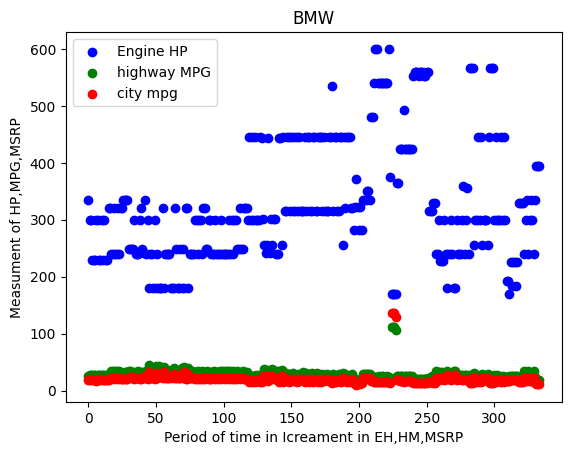

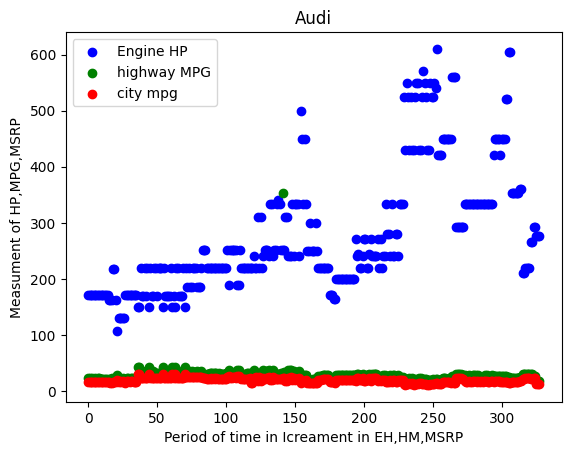

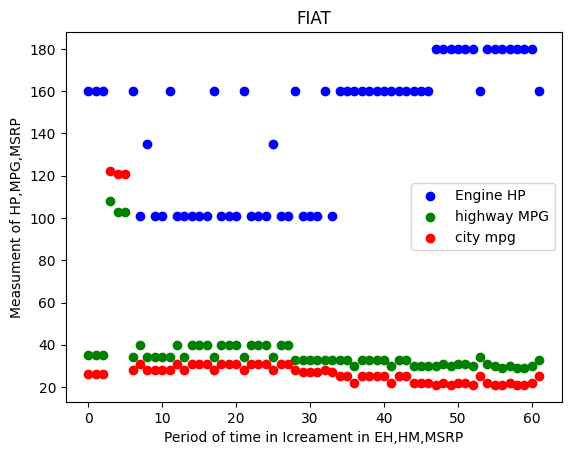

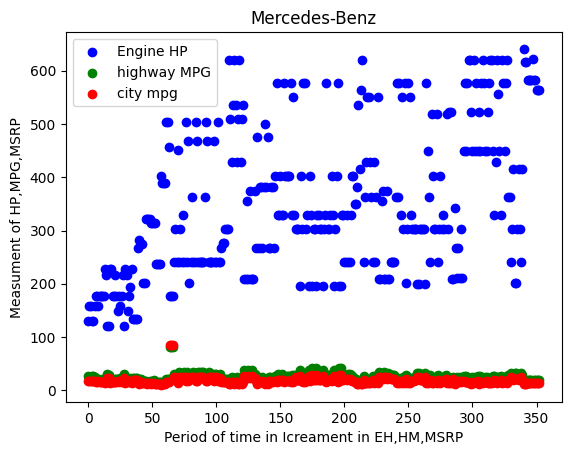

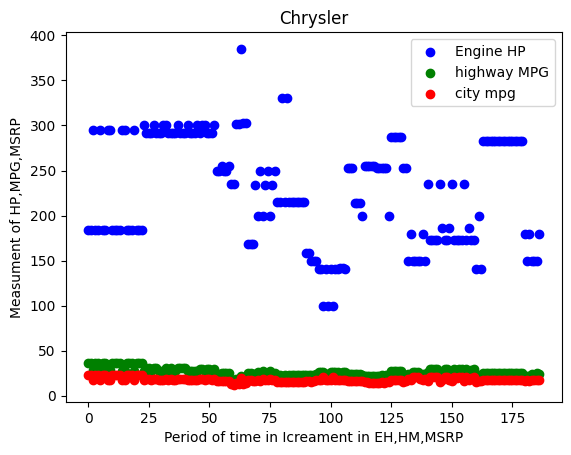

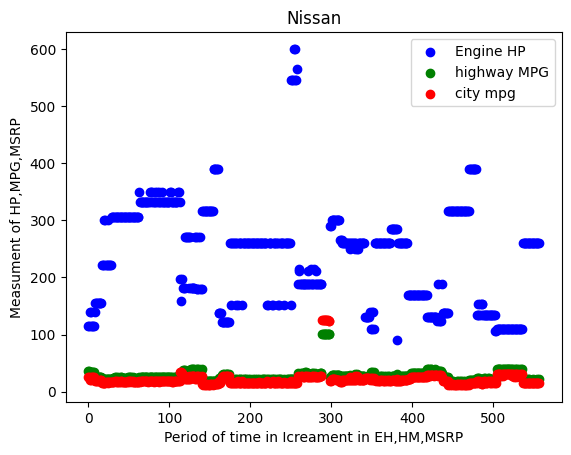

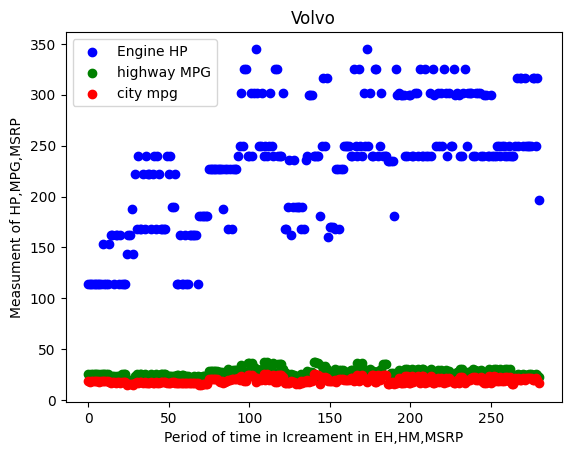

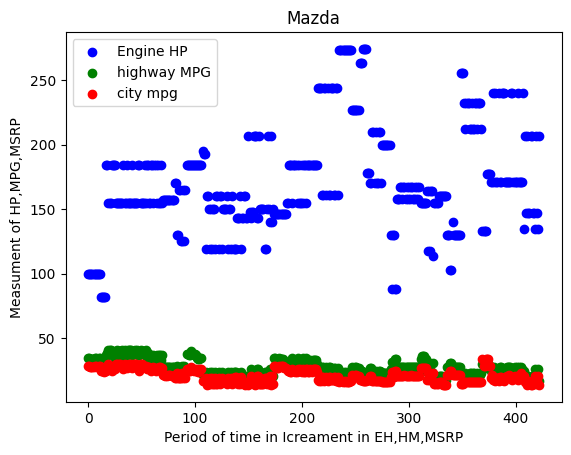

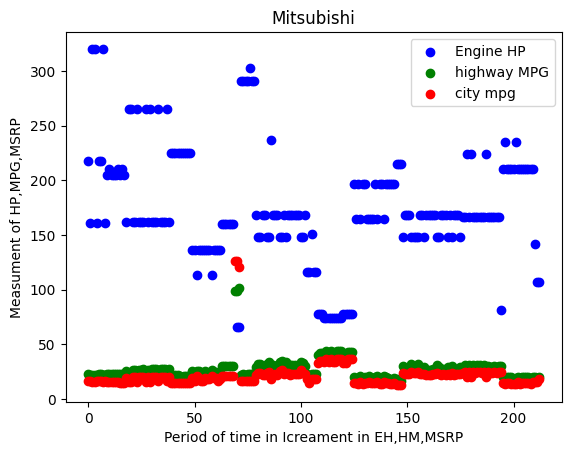

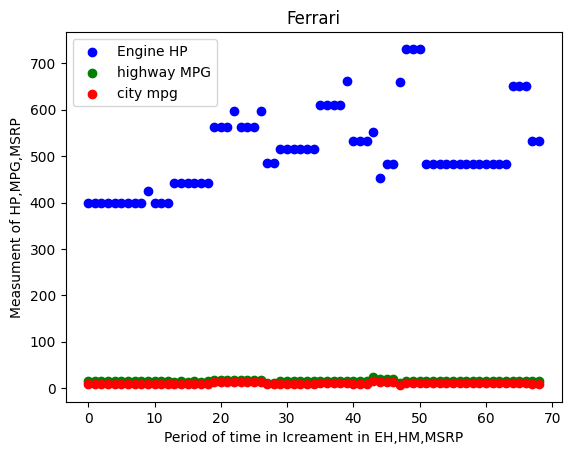

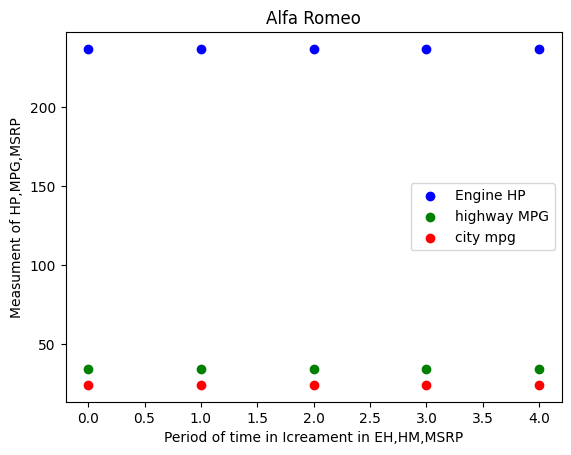

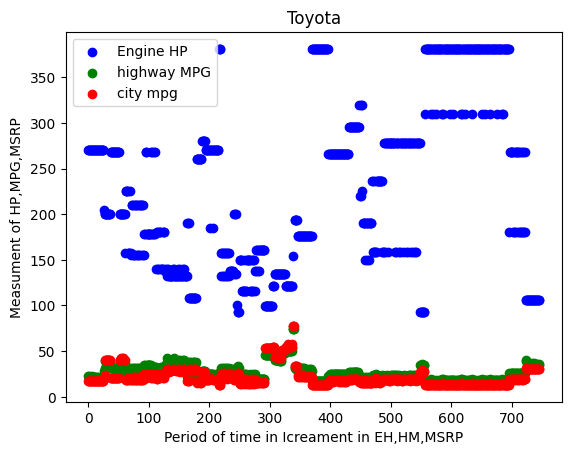

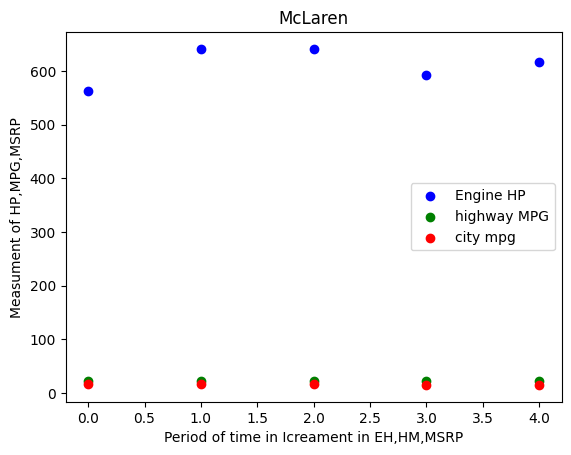

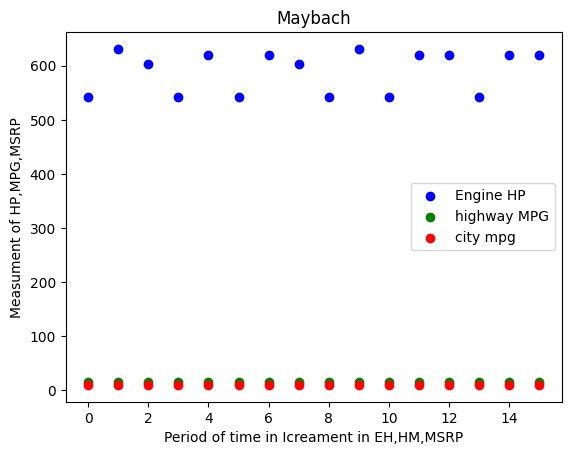

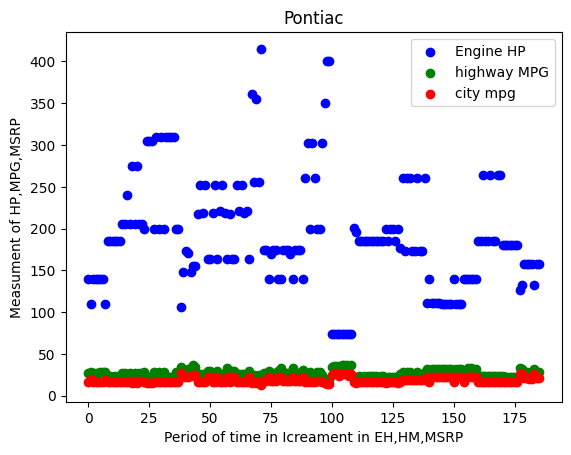

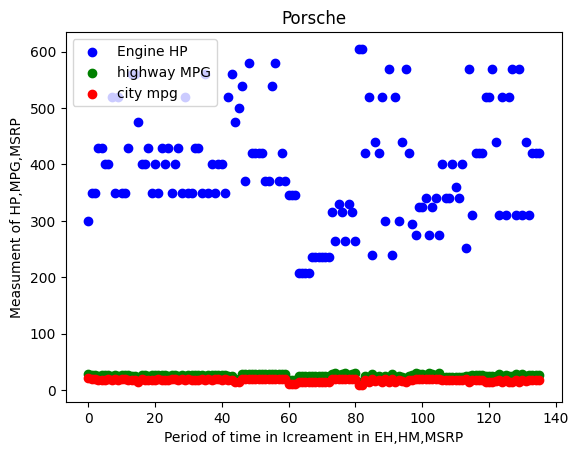

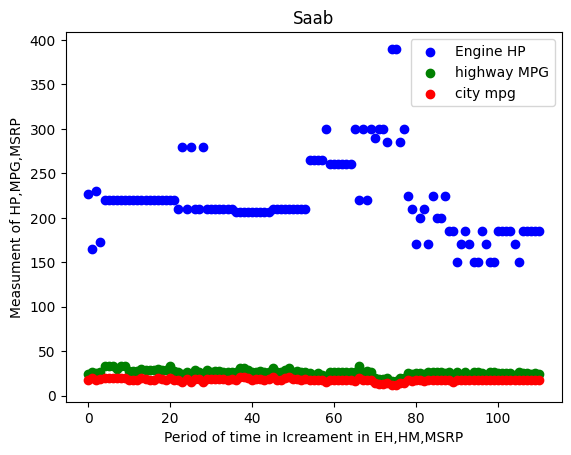

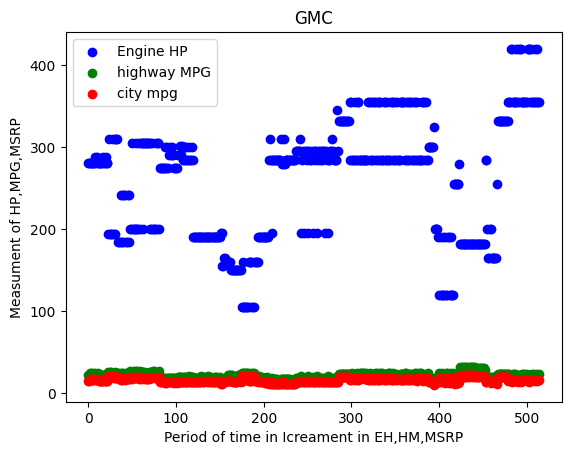

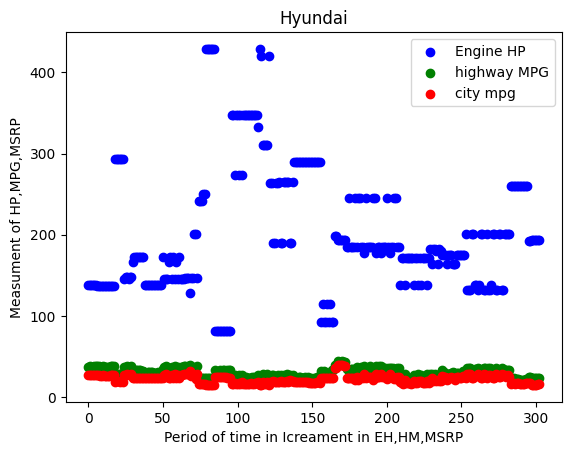

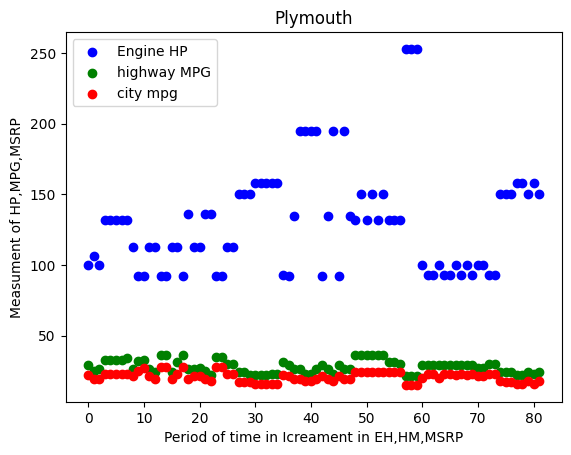

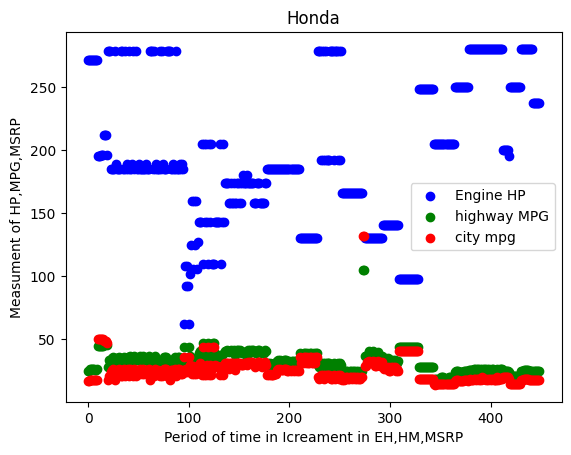

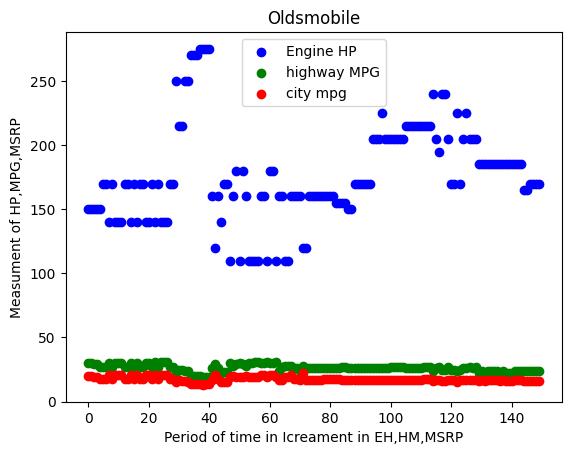

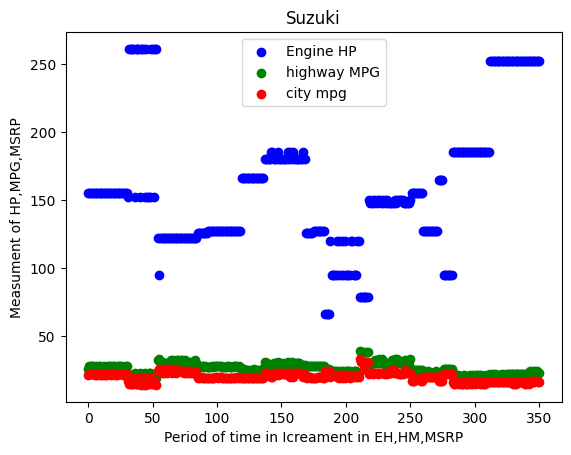

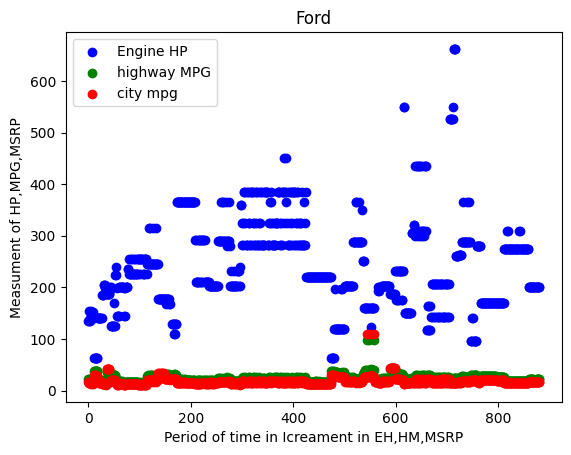

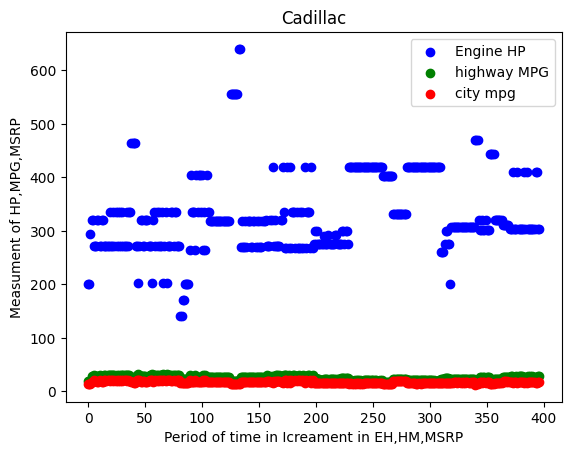

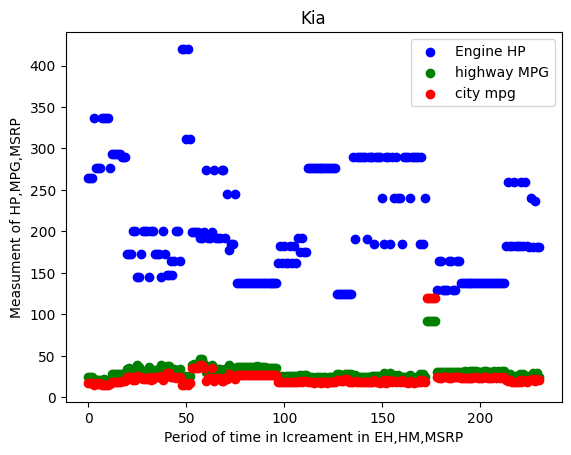

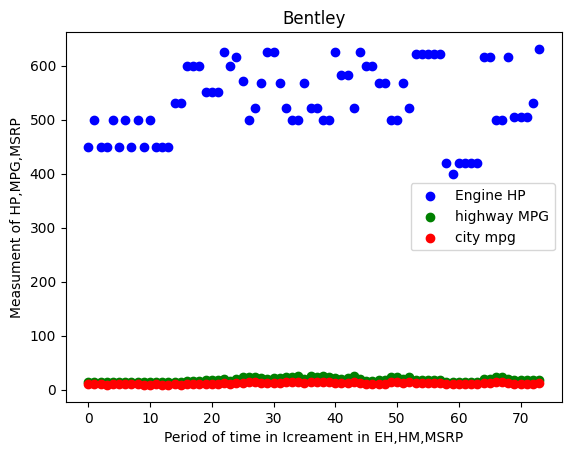

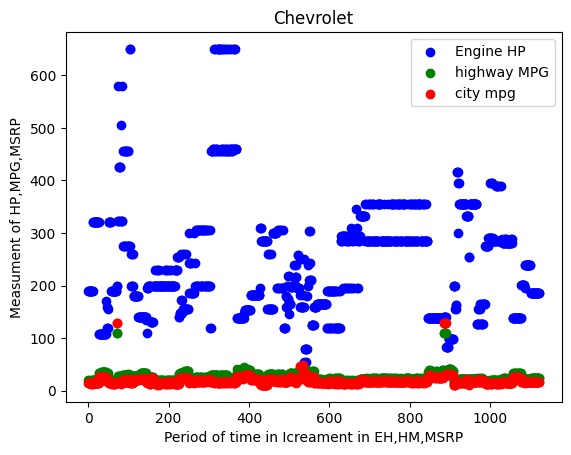

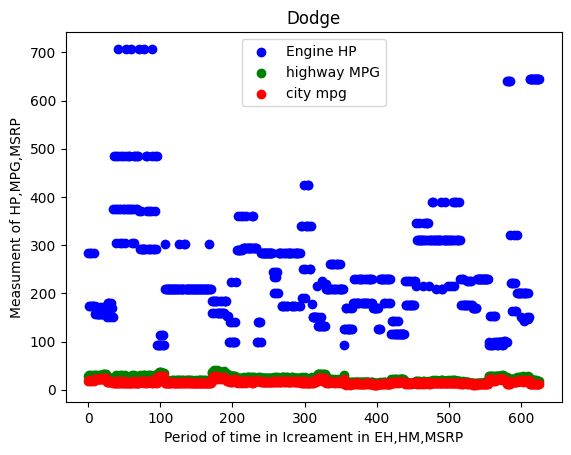

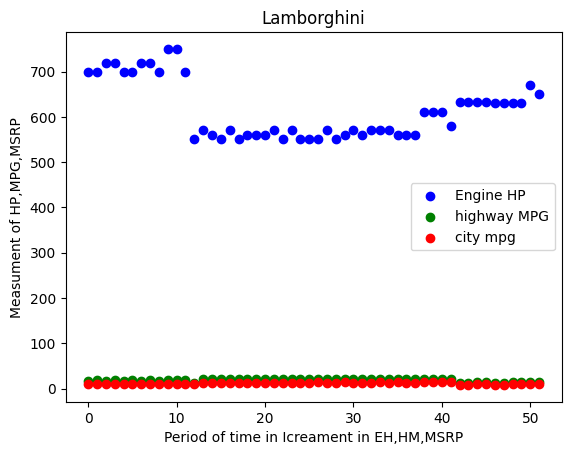

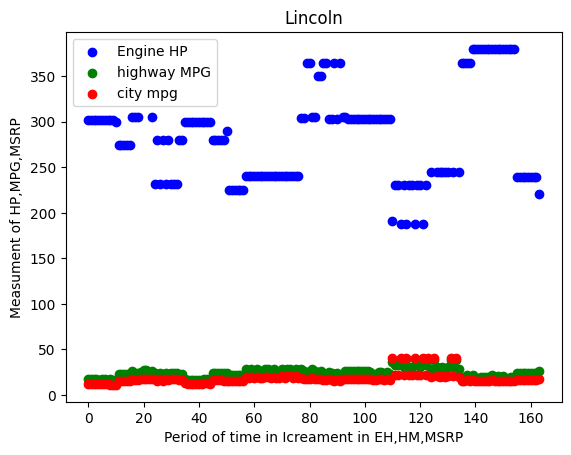

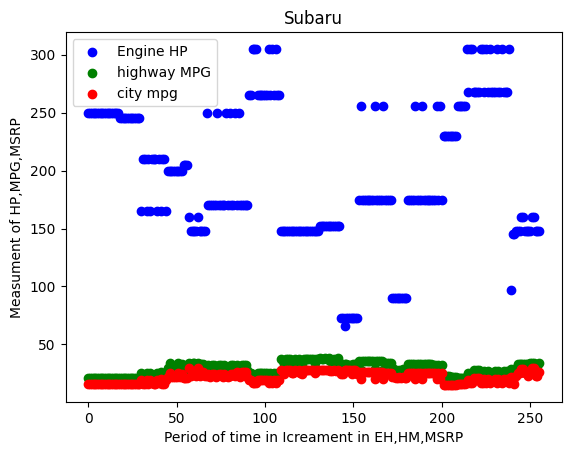

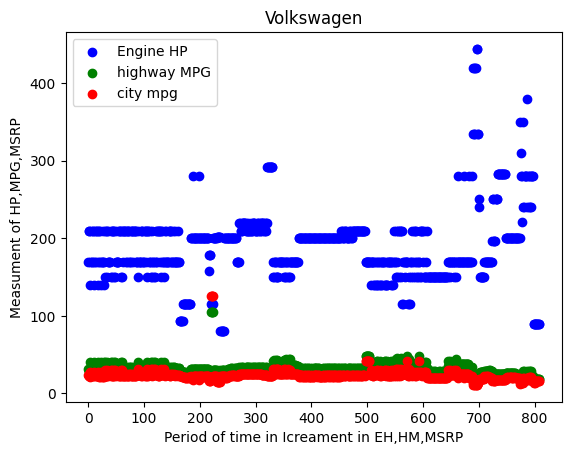

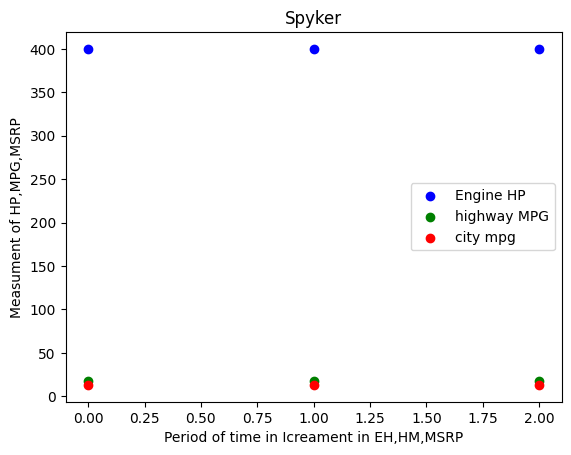

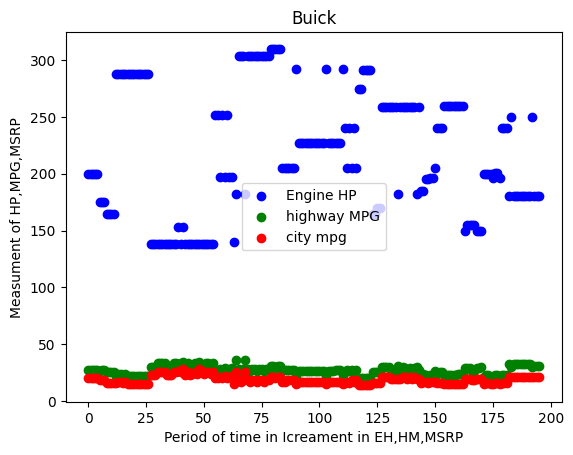

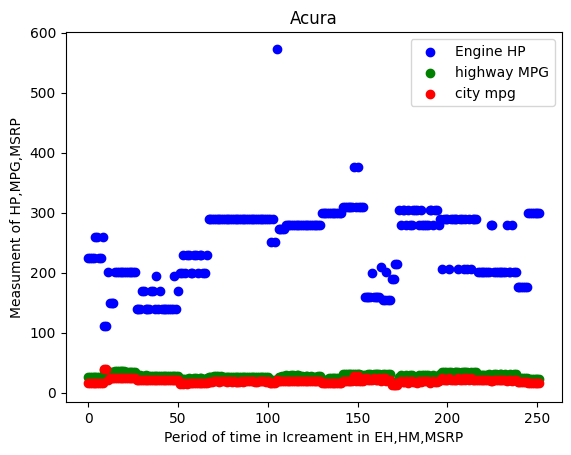

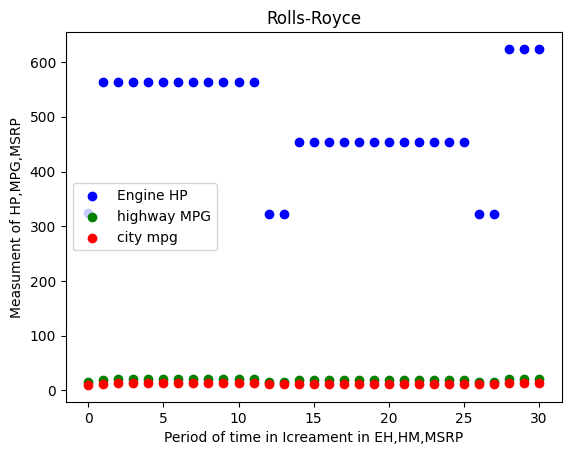

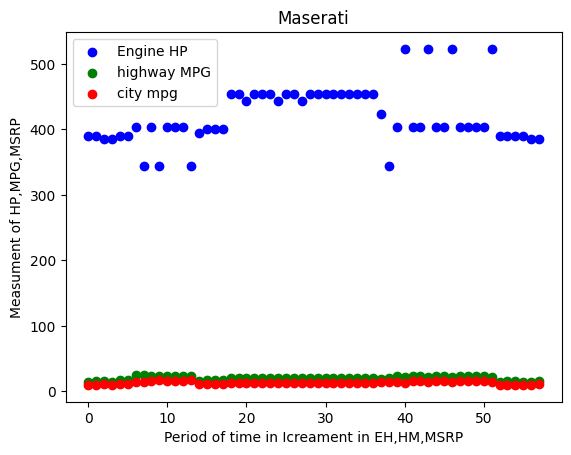

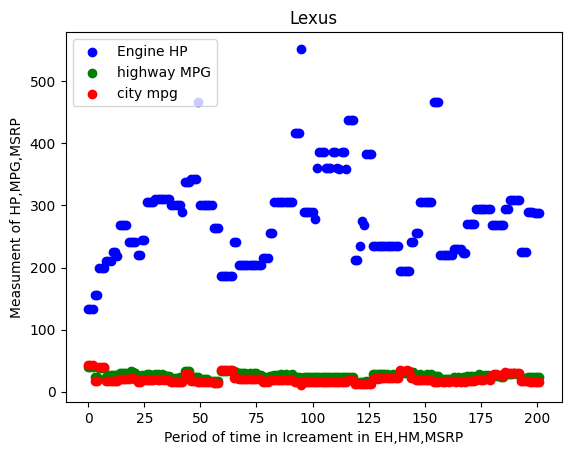

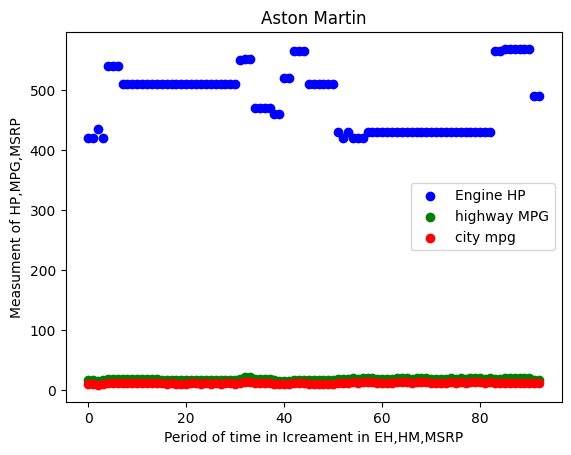

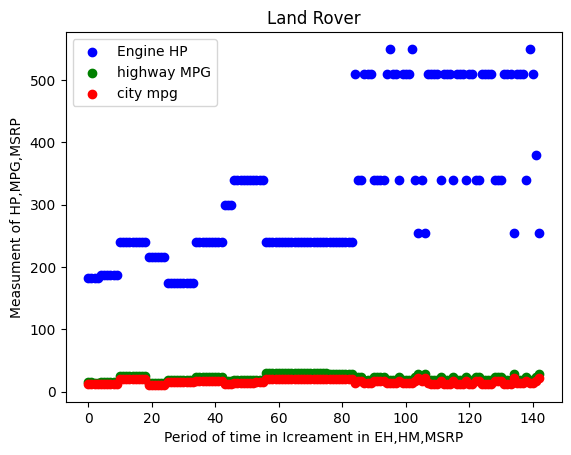

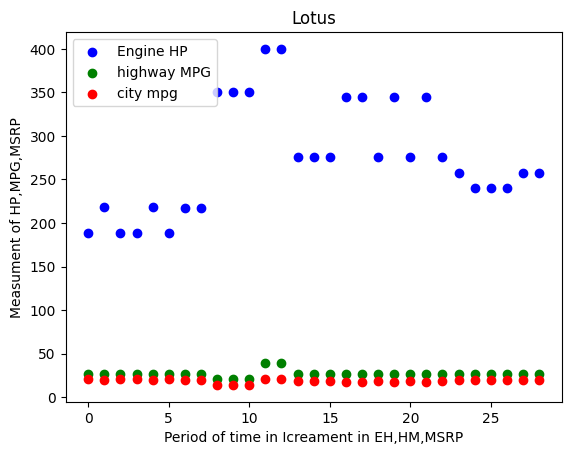

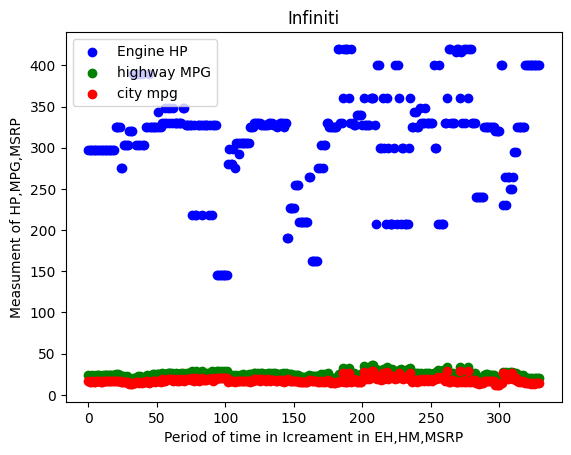

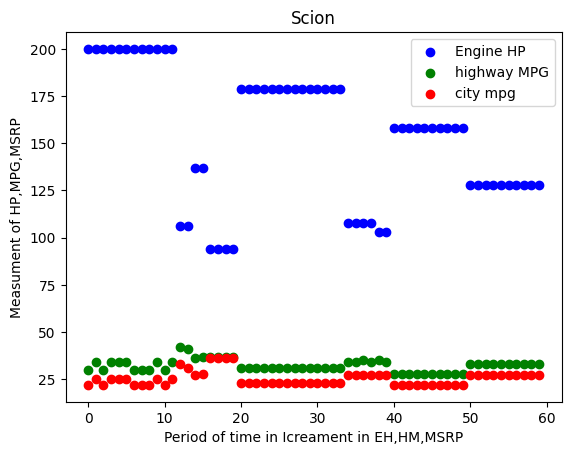

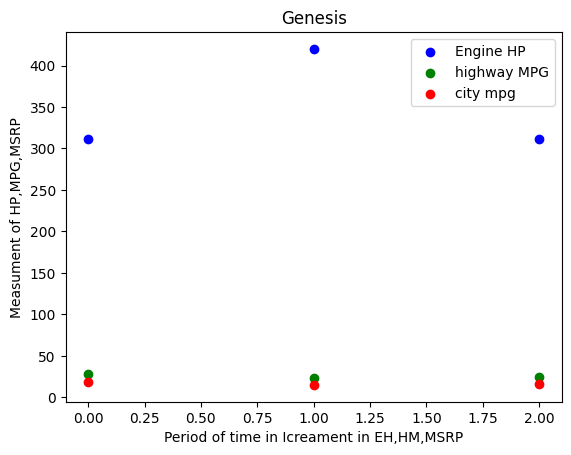

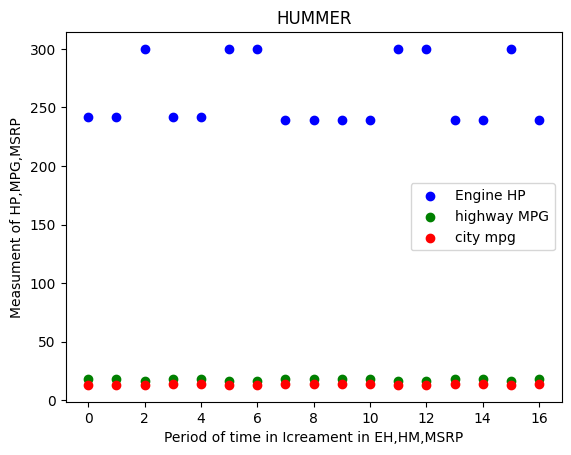

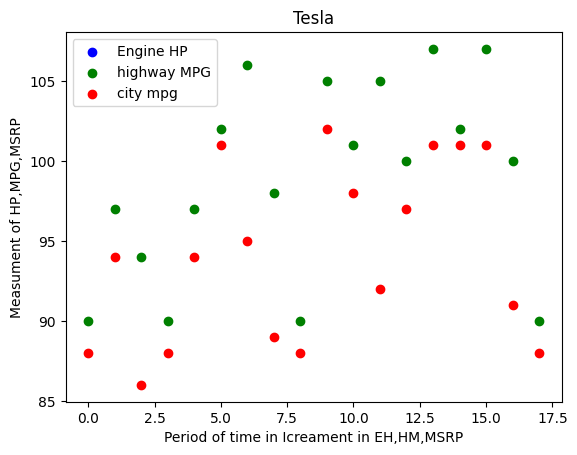

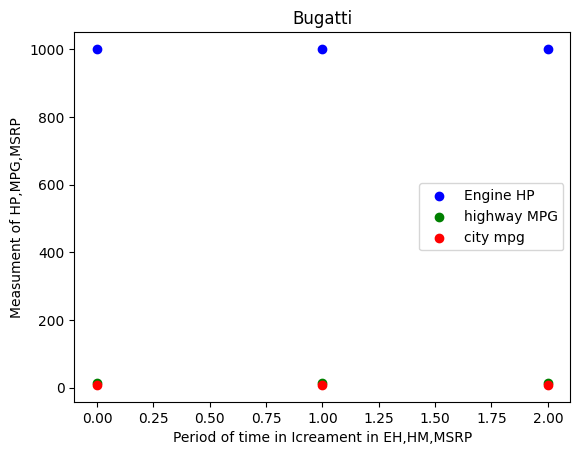

In [21]:
for i in range(0,len(st)):
    x = df[df["Whip"] == st[i]].reset_index()
    plt.scatter(np.arange(0,len(x)),x["Engine HP"],color ="blue",label = "Engine HP")
    plt.scatter(np.arange(0,len(x)),x["highway MPG"],color ="green",label = "highway MPG")
    plt.scatter(np.arange(0,len(x)),x["city mpg"],color ="red",label = "city mpg")
    plt.title(st[i])
    plt.xlabel("Period of time in Icreament in EH,HM,MSRP")
    plt.ylabel("Measument of HP,MPG,MSRP")
    plt.legend()
    plt.show()
    

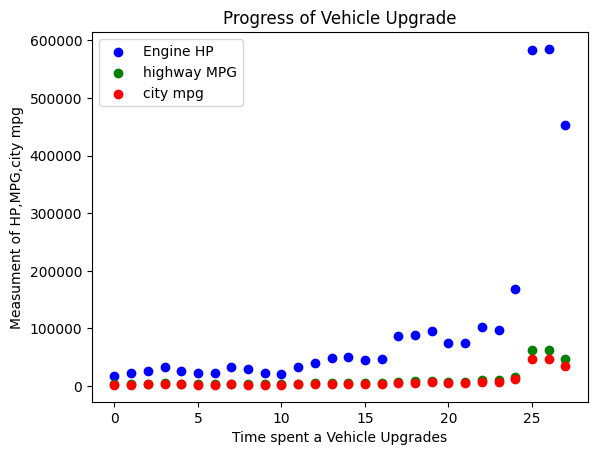

In [6]:
df4 = df.groupby(["Year"])[["Engine HP","highway MPG","city mpg"]].sum().reset_index()

x = df4
plt.scatter(np.arange(0,len(x)),x["Engine HP"],color = "blue", label = "Engine HP")
plt.scatter(np.arange(0,len(x)),x["highway MPG"] ,color = "green", label = "highway MPG")
plt.scatter(np.arange(0,len(x)), x["city mpg"],color = "red", label = "city mpg")
plt.title("Progress of Vehicle Upgrade")
plt.xlabel("Time spent a Vehicle Upgrades")
plt.ylabel("Measument of HP,MPG,city mpg")
plt.legend()
plt.show()

In [22]:
df["Transmission Type"].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
df["Vehicle Style"] = l.fit_transform(df["Vehicle Style"])
df["Vehicle Style"].unique()

array([ 8,  6, 14, 15,  2,  0,  3, 11,  4,  9, 13, 10,  1,  5,  7, 12])

In [24]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
df["Transmission Type"] = l.fit_transform(df["Transmission Type"])
df["Transmission Type"].unique()

array([3, 1, 0, 2, 4])

In [25]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



x = df[["highway MPG","city mpg","Popularity","MSRP","Engine HP","Engine Cylinders"]]
y = df["Transmission Type"]

X_train,X_test,y_train,y_test = train_test_split( x,y, test_size = 0.3, random_state = 42)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
z = xgb.XGBClassifier()

params = {"learning_rate":[0.01,0.001,0.1], "max_depth":[11,12,13,14], "n_estimators":[90,100]}

grid = GridSearchCV(estimator = z, param_grid = params, cv = 5, verbose = 1, n_jobs = -1)

grid.fit(X_train,y_train)
gbp = grid.best_params_
gbp










Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'learning_rate': 0.1, 'max_depth': 14, 'n_estimators': 90}

In [26]:
grid.best_score_

0.9387228309733736

In [27]:
from sklearn.metrics import accuracy_score

bm = xgb.XGBClassifier(**gbp)
bm.fit(X_train,y_train)
y_pred = bm.predict(X_test)
ac = accuracy_score(y_pred,y_test)
ac


0.8551048951048951